In [37]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import normalize

## Clustering (K-Means)

In [38]:
country_codes = ['IND','IRQ']
ind1=["SP.POP.GROW"]  # Population Growth
ind2=["EN.ATM.CO2E.KT"]  # Energy Use

In [39]:
my_df1  = wb.data.DataFrame(ind1, country_codes, mrv=50).T
my_df1=my_df1.fillna(my_df1.mean())
my_df1.head()

economy,IND,IRQ
YR1971,2.257900,3.349950
YR1972,2.301189,3.297345
YR1973,2.327408,3.259853
YR1974,2.331906,3.244904
YR1975,2.321760,3.240035


In [40]:
my_df2  = wb.data.DataFrame(ind2, country_codes, mrv=50).T
my_df2=my_df2.fillna(my_df2.mean())
my_df2.head()

economy,IND,IRQ
YR1990,562480.0,64850.0
YR1991,607340.0,46770.0
YR1992,630260.0,67390.0
YR1993,652470.0,88770.0
YR1994,687950.0,99730.0


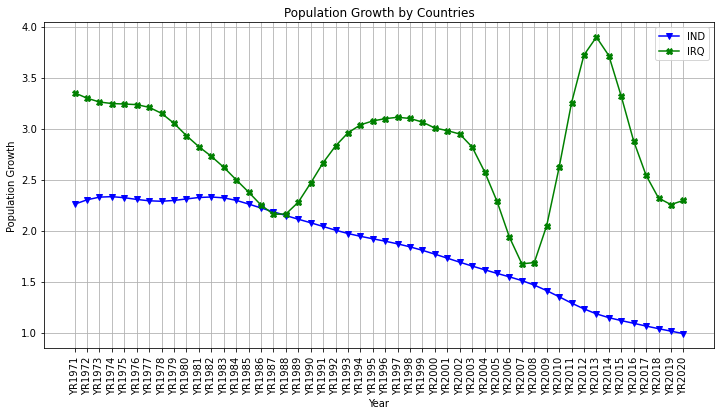

In [41]:
plt.figure(figsize=(12,6))
plt.title('Population Growth by Countries')
plt.plot(my_df1[my_df1.columns[0]],"bv-",label=my_df1.columns[0])
plt.plot(my_df1[my_df1.columns[1]],"gX-",label=my_df1.columns[1])
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Population Growth")
plt.legend(loc="best")
plt.grid()
plt.show()

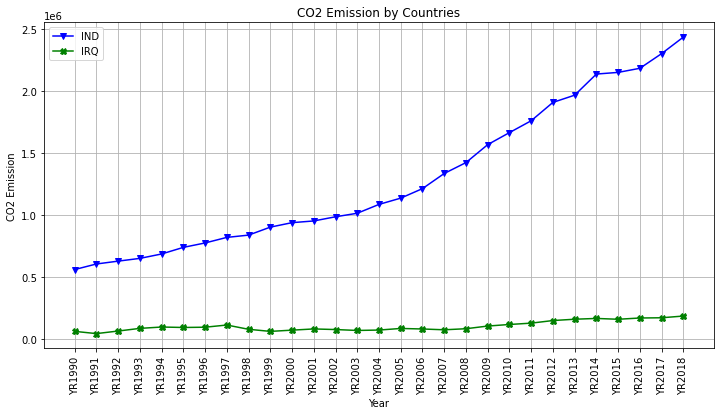

In [42]:
plt.figure(figsize=(12,6))
plt.title('CO2 Emission by Countries')
plt.plot(my_df2[my_df2.columns[0]],"bv-",label=my_df2.columns[0])
plt.plot(my_df2[my_df2.columns[1]],"gX-",label=my_df2.columns[1])
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("CO2 Emission")
plt.legend(loc="best")
plt.grid()
plt.show()

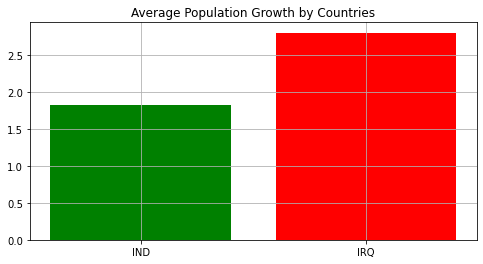

In [43]:
plt.figure(figsize=(8,4))
plt.title('Average Population Growth by Countries')
plt.bar(my_df1.columns,[my_df1.iloc[:,0].mean(),my_df1.iloc[:,1].mean()],color=["g","r"])
plt.grid()
plt.show()

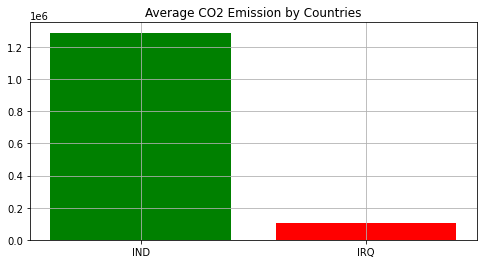

In [44]:
plt.figure(figsize=(8,4))
plt.title('Average CO2 Emission by Countries')
plt.bar(my_df2.columns,[my_df2.iloc[:,0].mean(),my_df2.iloc[:,1].mean()],color=["g","r"])
plt.grid()
plt.show()

In [45]:
def normal(data):
    nm=normalize(data)
    return nm
nrmdata=normal(my_df1.values)
nrmdata[:5]

array([[0.55890886, 0.82922909],
       [0.57230132, 0.82004341],
       [0.58106319, 0.81385845],
       [0.58357525, 0.81205906],
       [0.5824751 , 0.81284854]])

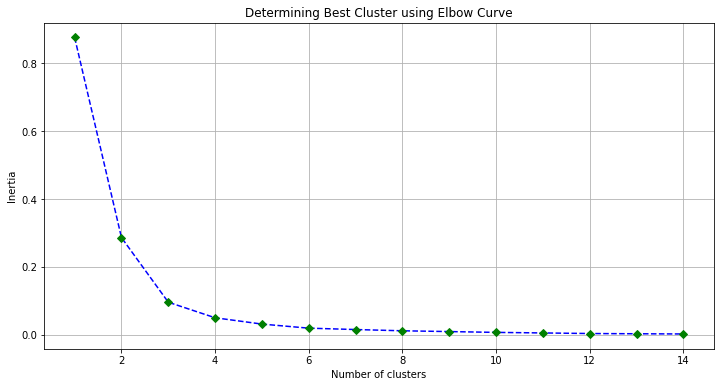

In [46]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,  random_state=0)
    kmeans.fit(nrmdata)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.title('Determining Best Cluster using Elbow Curve')
plt.plot(range(1, 15), wcss,"b--")
plt.plot(range(1, 15), wcss,"Dg")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

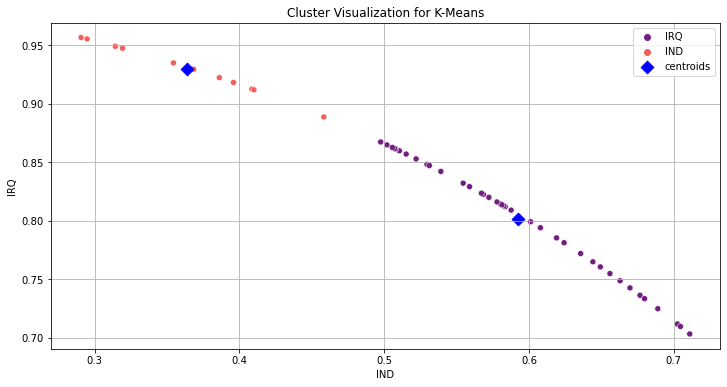

In [47]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmodel = kmeans.fit(nrmdata)
klb=[]
for i in kmeans.labels_:
    if i==0:
        klb.append(my_df1.columns[0])
    elif i==1:
        klb.append(my_df1.columns[1])
df=pd.DataFrame(nrmdata,columns=my_df1.columns)
plt.figure(figsize=(12,6))
plt.title('Cluster Visualization for K-Means')
sns.scatterplot(data=df, x=my_df1.columns[0], y=my_df1.columns[1], hue=klb,palette="magma")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="D", c="b", s=80, label="centroids")
plt.grid()
plt.legend()
plt.show()

In [48]:
aff = AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15)
affmodel = aff.fit(nrmdata)
affmodel.predict(nrmdata)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 4, 3, 3, 3,
       3, 4, 4, 4, 4, 4], dtype=int64)

In [49]:
affmodel.cluster_centers_

array([[0.58357525, 0.81205906],
       [0.67669338, 0.73626495],
       [0.51049748, 0.85987925],
       [0.3142236 , 0.949349  ],
       [0.38605423, 0.92247609]])

In [50]:
clst_lbl=[]
for i in affmodel.labels_:
    if i==0:
        clst_lbl.append("C-0")
    elif i==1:
        clst_lbl.append("C-1")
    elif i==2:
        clst_lbl.append("C-2")
    elif i==3:
        clst_lbl.append("C-3")
    elif i==4:
        clst_lbl.append("C-4")

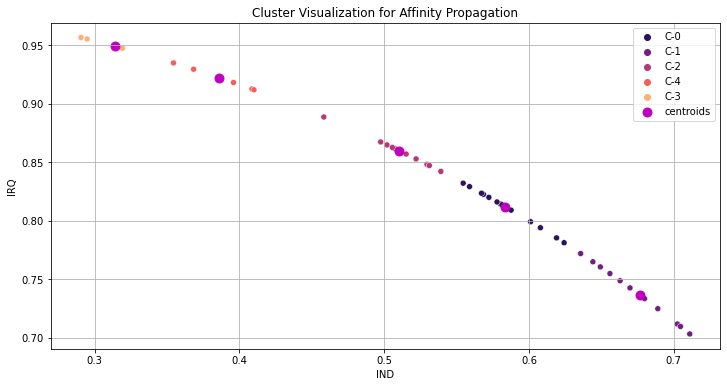

In [51]:
df=pd.DataFrame(nrmdata,columns=my_df1.columns)
plt.figure(figsize=(12,6))
plt.title('Cluster Visualization for Affinity Propagation')
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue=clst_lbl,palette="magma")
plt.scatter(affmodel.cluster_centers_[:,0], affmodel.cluster_centers_[:,1], marker="o", c="m", s=80, label="centroids")
plt.grid()
plt.legend()
plt.show()

## Curve Fitting

In [52]:
from scipy.optimize import curve_fit
#!pip install lmfit
from lmfit import Model

ModuleNotFoundError: No module named 'lmfit'

In [ ]:
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / wid)

In [ ]:
nvals= normal(my_df2.values)

y = gaussian(nvals[:,1], 1.9, 0.4, 1.22) + np.random.normal(0, 0.2, nvals.shape[0])

init_vals = [1, 0, 1] 
best_vals, covar = curve_fit(gaussian, nvals[:,1], y, p0=init_vals,maxfev = 7000)
gmodel = Model(gaussian)

In [ ]:
result = gmodel.fit(y, x=nvals[:,1], amp=5, cen=5, wid=1)

print(result.fit_report())

plt.figure(figsize=(8,4))
plt.title('Data View')
plt.plot(nvals[:,1],"go",label="Data")
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
plt.title('Curve Fitting')
plt.plot(result.init_fit, 'm--', label='initial fit')
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Best Curve Fitting')
plt.plot(result.best_fit, 'b-', label='best fit')
plt.legend()
plt.grid()
plt.show()